## This notebook shows how to handle the high-frequency IFS data (ddh) and gives some guidelines for plotting 

In [15]:
import glob
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import sys
import datetime as dt
#import cartopy.crs as ccrs
# adding ddh_funcs to the system path
sys.path.insert(0, '/home/b/b381679/hack2/pre-cy2/nextGems_Cycle2/IFS')
from ddh_funcs import load_ddh # 


In [16]:
# we decide what we want to load:
stat='012' #001 to 030 # 012 is CABAUW, NL
month='03'
run='2.8km' # 2.8km,4km,9km
ftype='sfcflx' # sfcvar,sfcflux
###

In [17]:
ds = load_ddh('/work/bm1235/a270046/cycle2-sync/ddh_output/'+run+'/ddh_2020'+month+'/'+run+'_2020'+month+'_'+ftype+'_'+stat,ftype)

In [18]:
ds

<xarray.Dataset>
Dimensions:       (time: 22320)
Coordinates:
  * time          (time) datetime64[ns] 2020-03-01T00:02:00 ... 2020-04-01
    station_nr    int64 12
    lat           float64 51.98
    lon           float64 4.94
    station_name  <U9 'CABAUW_NL'
Data variables: (12/18)
    slhf          (time) float64 -23.2 -23.6 -24.13 -24.53 ... 2.267 2.267 2.133
    fdir          (time) float64 0.0 0.0 0.0 0.0 ... 2.328e-10 -2.328e-10 0.0
    sshf          (time) float64 54.67 54.53 54.53 54.53 ... 4.667 4.4 4.4 4.267
    sfcsw         (time) float64 0.0 0.0 0.0 0.0 ... 0.0 4.657e-10 -4.657e-10
    sfclw         (time) float64 -63.87 -61.73 -60.8 ... -14.4 -14.27 -14.13
    sfcswc        (time) float64 -2.328e-10 2.328e-10 0.0 0.0 ... 0.0 0.0 0.0
    ...            ...
    LS prec.frac  (time) float64 0.0 1.819e-12 0.0 -1.819e-12 ... 1.0 1.0 1.0
    sfcswd        (time) float64 -2.328e-10 0.0 0.0 0.0 ... 0.0 0.0 4.657e-10
    sfclwd        (time) float64 262.4 264.5 262.4 262.4 ... 337.1 332.8 334.9
    z             (time) float64 -20.05 -20.05 -20.05 ... -20.05 -20.05 -20.05
    Land frac     (time) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    sfcp          (time) float64 1.024e+05 1.024e+05 ... 1.02e+05 1.02e+05
Attributes:
    exp:      hr0n
    vp:       1
    ty:       4

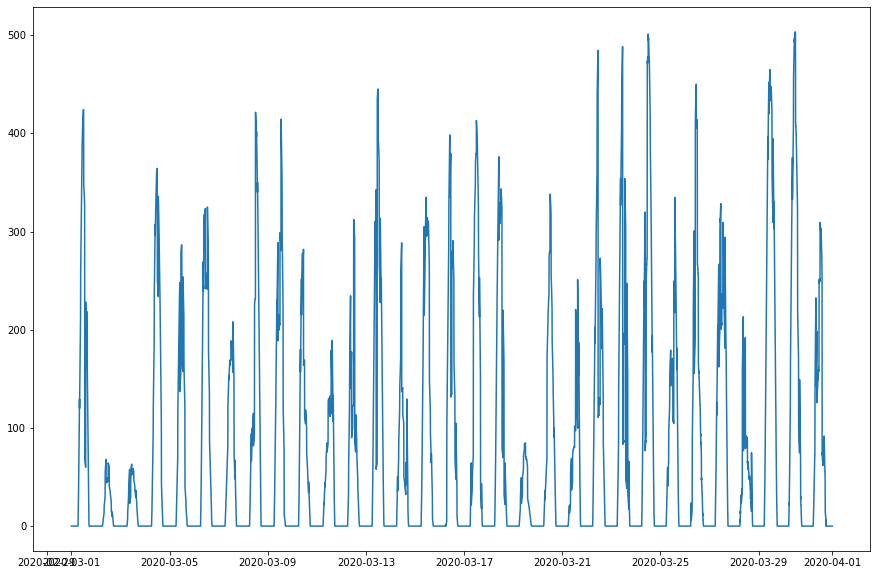

In [21]:
plt.figure(figsize=(15,10))
plt.plot(ds.time,ds['sfcsw'])

In [6]:
# we can also quickly concatenate the full year for a given station:
month='??'
run='9km'
ftype='sfcvar' 
dsmonths = [load_ddh(fn, ftype)
       for fn in sorted(glob.glob('/work/bm1235/a270046/cycle2-sync/ddh_output/'+run+'/ddh_2020??/'+run+'_2020??_'+ftype+'_'+stat))]
       #for fn in sorted(glob.glob("/work/bm1235/a270046/cycle2-sync/ddh_output/2.8km/ddh_202003/'2.8km_202003_sfcvar_'+stat"))]
dsyear = xr.concat(dsmonths, dim="time")
dsyear

<xarray.Dataset>
Dimensions:       (time: 66623)
Coordinates:
  * time          (time) datetime64[ns] 2020-01-20T00:15:00 ... 2021-01-01
    station_nr    int64 12
    lat           float64 51.99
    lon           float64 4.95
    station_name  <U9 'CABAUW_NL'
Data variables:
    2t            (time) float64 274.5 274.5 274.5 274.6 ... 274.9 274.9 274.9
    2q            (time) float64 0.003926 0.003925 ... 0.004217 0.004207
    10u           (time) float64 1.717 1.715 1.617 1.53 ... 1.428 1.484 1.548
    10v           (time) float64 -1.792 -1.736 -1.607 ... 3.401 3.419 3.43
    zo            (time) float64 0.2705 0.2706 0.2706 ... 0.2773 0.2773 0.2773
    zoh           (time) float64 0.002401 0.0024 0.002399 ... 0.00269 0.00269
    al            (time) float64 0.1421 0.1421 0.1421 ... 0.1438 0.1438 0.1437
    blh           (time) float64 54.79 53.89 53.45 53.34 ... 210.9 216.2 222.5
    tsk           (time) float64 273.0 273.0 273.1 273.2 ... 274.2 274.1 274.1
Attributes:
    exp:      hr2n
    vp:       1
    ty:       4

In [7]:
#if we just want max,min and mean daily data of 10m windspeed
windspeed = np.sqrt(dsyear['10u']**2+dsyear['10v']**2)

In [8]:
dmean=windspeed.resample(time='D').mean()
dmax=windspeed.resample(time='D').max()
dmin=windspeed.resample(time='D').min()

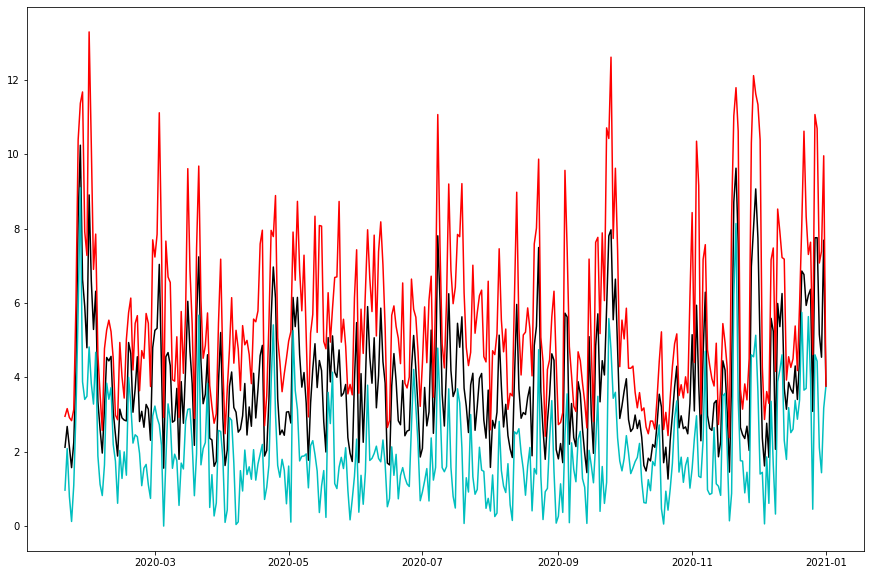

In [9]:
plt.figure(figsize=(15,10))
plt.plot(dmean.time,dmean.values,c='k')
plt.plot(dmin.time,dmin.values,c='c')
plt.plot(dmax.time,dmax.values,c='r')

In [10]:
# we will do now a histogram of 2t for the month of April
month='04'
dsApril = load_ddh('/work/bm1235/a270046/cycle2-sync/ddh_output/'+run+'/ddh_2020'+month+'/'+run+'_2020'+month+'_'+ftype+'_'+stat,ftype)
dsApril

<xarray.Dataset>
Dimensions:       (time: 5760)
Coordinates:
  * time          (time) datetime64[ns] 2020-04-01T00:07:30 ... 2020-05-01
    station_nr    int64 12
    lat           float64 51.99
    lon           float64 4.95
    station_name  <U9 'CABAUW_NL'
Data variables:
    2t            (time) float64 277.0 277.0 277.0 276.9 ... 274.8 274.8 274.9
    2q            (time) float64 0.004723 0.004714 ... 0.003815 0.003838
    10u           (time) float64 1.084 1.093 1.105 1.116 ... 1.56 1.654 1.627
    10v           (time) float64 -2.281 -2.263 -2.242 ... 1.841 1.593 1.337
    zo            (time) float64 0.2682 0.2682 0.2682 ... 0.2676 0.2676 0.2676
    zoh           (time) float64 0.002251 0.002252 ... 0.002259 0.002254
    al            (time) float64 0.1766 0.1766 0.1766 ... 0.1917 0.1917 0.1922
    blh           (time) float64 214.7 209.7 204.9 200.6 ... 35.24 37.4 40.31
    tsk           (time) float64 276.3 276.3 276.2 276.2 ... 273.1 273.1 273.2
Attributes:
    exp:      hr2n
    vp:       1
    ty:       4

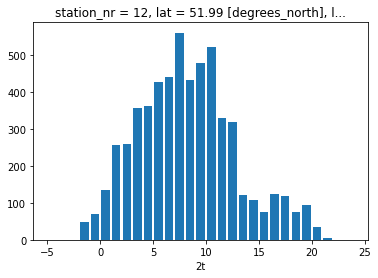

In [11]:
n, bins, patches=xr.plot.hist(dsApril['2t']-273.15,bins=np.arange(-5,25,1),rwidth=0.8)
